# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

### **Import Libraries and Settings**

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')

# **Task 1 : Conversion Rate Analysis Based on Income, Spending and Age**

## Data Understanding

In [3]:
df.sample(10)

Unnamed: 0     ID  Year_Birth Education Marital_Status      Income  \
756          756   4012        1972        S3    Bertunangan  62220000.0   
1556        1556    955        1962        S2    Bertunangan  47175000.0   
1412        1412    361        1969        S2        Menikah  43142000.0   
3              3   6182        1984        S1    Bertunangan  26646000.0   
1704        1704   7349        1973       SMA    Bertunangan   9722000.0   
1645        1645  10141        1960        S2          Cerai  39228000.0   
700          700   9977        1973        S1          Cerai  78901000.0   
1456        1456   4042        1971        S1          Cerai  43300000.0   
1880        1880   3074        1984        S3        Menikah  70643000.0   
1693        1693  10398        1981        D3         Lajang  24336000.0   

      Kidhome  Teenhome Dt_Customer  Recency  MntCoke  MntFruits  \
756         0         1  11-08-2012       55   799000      12000   
1556        1         1  28-10-2012       81   167000       2000   
1412        1         1  18-02-2014       84     5000       1000   
3           1         0  10-02-2014       26    11000       4000   
1704        1         0  02-10-2012        7     6000      17000   
1645        0         0  10-05-2013        1     7000       1000   
700         0         1  17-09-2013       99   321000      11000   
1456        0         1  13-10-2012       87    91000       3000   
1880        0         0  15-10-2012       66  1218000     107000   
1693        1         0  27-08-2012       82     1000       6000   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
756            375000            16000             12000         12000   
1556            44000             6000              2000         19000   
1412             7000             2000              1000          4000   
3               20000            10000              3000          5000   
1704            16000             6000             16000         42000   
1645             6000                0              3000          3000   
700            309000            33000             26000         34000   
1456            52000             2000              1000         31000   
1880           304000            23000            143000         33000   
1693             2000             8000              2000         12000   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
756                   5                7                    6   
1556                  7                4                    2   
1412                  1                1                    0   
3                     2                2                    0   
1704                  4                3                    1   
1645                  1                0                    0   
700                   3                9                    3   
1456                  3                4                    0   
1880                  1                5                    8   
1693                  1                1                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
756                   5                  6             0             0   
1556                  4                  8             1             0   
1412                  2                  7             0             0   
3                     4                  6             0             0   
1704                  3                  8             0             0   
1645                  3                  4             0             0   
700                   5                  4             0             0   
1456                  4                  8             0             0   
1880                  4                  6             0             0   
1693                  2                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \

In [4]:
# Initial transformation
df.drop('Unnamed: 0', axis=1, inplace=True)
df.sort_index(inplace=True)

### **Data Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- The data have 2240 rows and 29 columns
- Other than Dt_Customer that we will convert to datetime, every features have the correct data types.

In [42]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [45]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')

### Check Duplicate Values

In [6]:
df.duplicated().sum()

0

### Check Missing Values

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

`Income` column have a small percentage missing values, we will need to handle that with imputation based on the distribution

<Axes: xlabel='Income', ylabel='Count'>

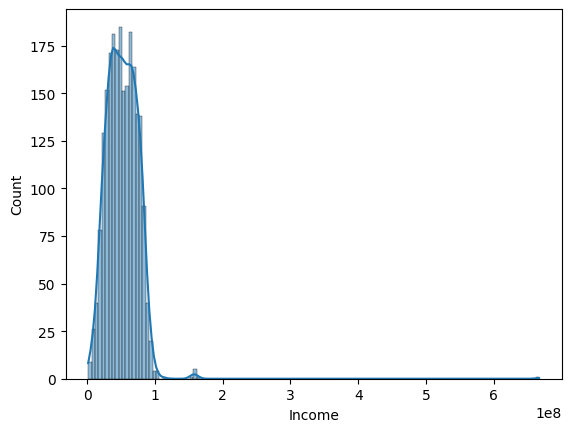

In [27]:
# Checking income distribution for imputation method
sns.histplot(data=df, x='Income', kde=True)

Since the distribution is positive skewed then we will impute the missing values with median

In [28]:
df['Income'] = df['Income'].fillna(df['Income'].median())

## Columns Grouping Based on Data Type

In [39]:
# Check dataframe values
df.sample(10)

ID  Year_Birth Education Marital_Status      Income  Kidhome  \
2116    87        1981        D3        Menikah  27733000.0        1   
1656  2285        1954        S2    Bertunangan  36634000.0        0   
751   7938        1958        S3    Bertunangan  51518000.0        0   
1419  4098        1973        S1        Menikah  24639000.0        1   
0     5524        1957        S1         Lajang  58138000.0        0   
2067  7899        1952        S3        Menikah  77610000.0        0   
518   4607        1959        S1    Bertunangan  71367000.0        0   
137   9579        1959        S3        Menikah  33762000.0        2   
2065   123        1951        S1          Janda  67046000.0        0   
1654    13        1947        S3          Janda  25358000.0        0   

      Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
2116         0  26-08-2013       16        0       7000             5000   
1656         1  28-05-2013        0   213000       9000            76000   
751          1  03-10-2013       92   350000       8000            66000   
1419         1  28-01-2014        3    20000       3000            16000   
0            0  04-09-2012       58   635000      88000           546000   
2067         1  29-10-2012       70  1245000      33000           332000   
518          0  23-08-2013       24   227000      23000           389000   
137          1  07-07-2013       61    53000       1000            34000   
2065         1  06-01-2013       92   544000      35000           133000   
1654         1  22-07-2013       57    19000          0             5000   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2116            26000              2000         17000                  2   
1656             4000              3000         30000                  3   
751             17000              4000          4000                  2   
1419                0              4000          1000                  3   
0              172000             88000         88000                  3   
2067            21000             33000         16000                  2   
518             42000             21000         75000                  1   
137              2000                 0         16000                  3   
2065            23000            151000        107000                  2   
1654                0                 0          8000                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2116                2                    0                  3   
1656                5                    2                  5   
751                 3                    2                 10   
1419                2                    0                  4   
0                   8                   10                  4   
2067                4                    7                  4   
518                 4                    5                  7   
137                 2                    2                  2   
2065                4                    5                  4   
1654                1                    0                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2116                  7             0             0             0   
1656                  7             0             0             0   
751                   3             0             0             0   
1419                  6             0             0             0   
0                     7             0             0             0   
2067                  7             0             0             0   
518                   2             0             0             0   
137                   8             0             0             0   
2065                  2             0             0             0   
1654                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Reve

In [53]:
# # Another way of checking unique values (before grouping based on data types)
# for x in df.columns:
#     unique_values_check = list(df[x].unique())
#     unique_values_check.sort()

#     print(f"{x}")
#     print(f"{df[x].unique()}")
#     print()

#     # if len(unique_values_check) >= 10:
#     #     unique_values_check = unique_values_check[:10] + ['.....']
#     #     print(unique_values_check)
#     # else:
#     #     print(unique_values_check)
#     # print()

- Categorical columns (10 columns): 
    - `ID` : nominal
    - `Education` : ordinal
    - `Marital_Status` : nominal
    - `AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Complain, Response` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns)
    - `Year_Birth, Income, Kidhome, Teenhome, 
    Recency, MntCoke, MntFruits, MntMeatProducts, 
    MntFishProducts, MntSweetProducts, MntGoldProds, 
    NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, 
    NumStorePurchases, NumWebVisitsMonth, Z_CostContact, Z_Revenue`

- Date column (1 column) : `Dt_Customer`

In [49]:
# Grouping columns based on data types
cats_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

nums_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

date_cols = ['Dt_Customer']

In [24]:
# Checking every unique values in categorical columns
for col in cats_cols :
    print()
    print(f"{col} : {df[col].unique()}")


ID : [5524 2174 4141 ... 7270 8235 9405]

Education : ['S1' 'S3' 'S2' 'SMA' 'D3']

Marital_Status : ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']

AcceptedCmp1 : [0 1]

AcceptedCmp2 : [0 1]

AcceptedCmp3 : [0 1]

AcceptedCmp4 : [0 1]

AcceptedCmp5 : [0 1]

Complain : [0 1]

Response : [1 0]


In [25]:
# Checking every unique values in numerical columns
for col in nums_cols :
    print()
    print(f"{col} : {df[col].unique()}")


Year_Birth : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]

Income : [58138000. 46344000. 71613000. ... 56981000. 69245000. 52869000.]

Kidhome : [0 1 2]

Teenhome : [0 1 2]

Recency : [58 38 26 94 16 34 32 19 68 11 59 82 53 23 51 20 91 86 41 42 63  0 69 89
  4 96 56 31  8 55 37 76 99  3 88 80 72 24 92 39 29  2 54 57 30 12 18 75
 90  1 25 40  9 87  5 95 48 70 79 45 84 44 43 35 15 17 46 27 74 85 65 13
 83 10 21 61 73 47 36 49 28 64 98 78 77 81 14 52 93 50 60 66 97 62  6 33
 67 22 71  7]

MntCoke : [ 635000   11000  426000  173000  520000  235000   76000   14000   28000
    5000    6000  194000  233000    3000 1006000   53000   84000 1012000
    4000   86000    1000  867000  384000  270000   36000  684000    8000
  112000  110000   9600

## Statistical Summary

In [55]:
df[nums_cols].describe().transpose()

count          mean           std        min  \
Year_Birth           2240.0  1.968806e+03  1.198407e+01     1893.0   
Income               2240.0  5.223798e+07  2.503796e+07  1730000.0   
Kidhome              2240.0  4.441964e-01  5.383981e-01        0.0   
Teenhome             2240.0  5.062500e-01  5.445382e-01        0.0   
Recency              2240.0  4.910938e+01  2.896245e+01        0.0   
MntCoke              2240.0  3.039357e+05  3.365974e+05        0.0   
MntFruits            2240.0  2.630223e+04  3.977343e+04        0.0   
MntMeatProducts      2240.0  1.669500e+05  2.257154e+05        0.0   
MntFishProducts      2240.0  3.752545e+04  5.462898e+04        0.0   
MntSweetProducts     2240.0  2.706295e+04  4.128050e+04        0.0   
MntGoldProds         2240.0  4.402188e+04  5.216744e+04        0.0   
NumDealsPurchases    2240.0  2.325000e+00  1.932238e+00        0.0   
NumWebPurchases      2240.0  4.084821e+00  2.778714e+00        0.0   
NumCatalogPurchases  2240.0  2.662054e+00  2.923101e+00        0.0   
NumStorePurchases    2240.0  5.790179e+00  3.250958e+00        0.0   
NumWebVisitsMonth    2240.0  5.316518e+00  2.426645e+00        0.0   
Z_CostContact        2240.0  3.000000e+00  0.000000e+00        3.0   
Z_Revenue            2240.0  1.100000e+01  0.000000e+00       11.0   

                            25%         50%         75%          max  
Year_Birth               1959.0      1970.0      1977.0       1996.0  
Income               35538750.0  51381500.0  68289750.0  666666000.0  
Kidhome                     0.0         0.0         1.0          2.0  
Teenhome                    0.0         0.0         1.0          2.0  
Recency                    24.0        49.0        74.0         99.0  
MntCoke                 23750.0    173500.0    504250.0    1493000.0  
MntFruits                1000.0      8000.0     33000.0     199000.0  
MntMeatProducts         16000.0     67000.0    232000.0    1725000.0  
MntFishProducts          3000.0     12000.0     50000.0     259000.0  
MntSweetProducts         1000.0      8000.0     33000.0     263000.0  
MntGoldProds             9000.0     24000.0     56000.0     362000.0  
NumDealsPurchases           1.0         2.0         3.0         15.0  
NumWebPurchases             2.0         4.0         6.0         27.0  
NumCatalogPurchases         0.0         2.0         4.0         28.0  
NumStorePurchases           3.0         5.0         8.0         13.0  
NumWebVisitsMonth           3.0         6.0         7.0         20.0  
Z_CostContact               3.0         3.0         3.0          3.0  
Z_Revenue                  11.0        11.0        11.0         11.0

In [56]:
df[cats_cols].describe().transpose()

count         mean          std  min      25%     50%      75%  \
ID            2240.0  5592.159821  3246.662198  0.0  2828.25  5458.5  8427.75   
AcceptedCmp1  2240.0     0.064286     0.245316  0.0     0.00     0.0     0.00   
AcceptedCmp2  2240.0     0.013393     0.114976  0.0     0.00     0.0     0.00   
AcceptedCmp3  2240.0     0.072768     0.259813  0.0     0.00     0.0     0.00   
AcceptedCmp4  2240.0     0.074554     0.262728  0.0     0.00     0.0     0.00   
AcceptedCmp5  2240.0     0.072768     0.259813  0.0     0.00     0.0     0.00   
Complain      2240.0     0.009375     0.096391  0.0     0.00     0.0     0.00   
Response      2240.0     0.149107     0.356274  0.0     0.00     0.0     0.00   

                  max  
ID            11191.0  
AcceptedCmp1      1.0  
AcceptedCmp2      1.0  
AcceptedCmp3      1.0  
AcceptedCmp4      1.0  
AcceptedCmp5      1.0  
Complain          1.0  
Response          1.0

In [57]:
df[date_cols].describe().transpose()

count                           mean                  min  \
Dt_Customer  2240  2013-07-10 10:01:42.857142784  2012-07-30 00:00:00   

                             25%                  50%                  75%  \
Dt_Customer  2013-01-16 00:00:00  2013-07-08 12:00:00  2013-12-30 06:00:00   

                             max  
Dt_Customer  2014-06-29 00:00:00

# Univariate Analysis

## Numerical Columns

In [89]:
len(df[nums_cols].columns)

18

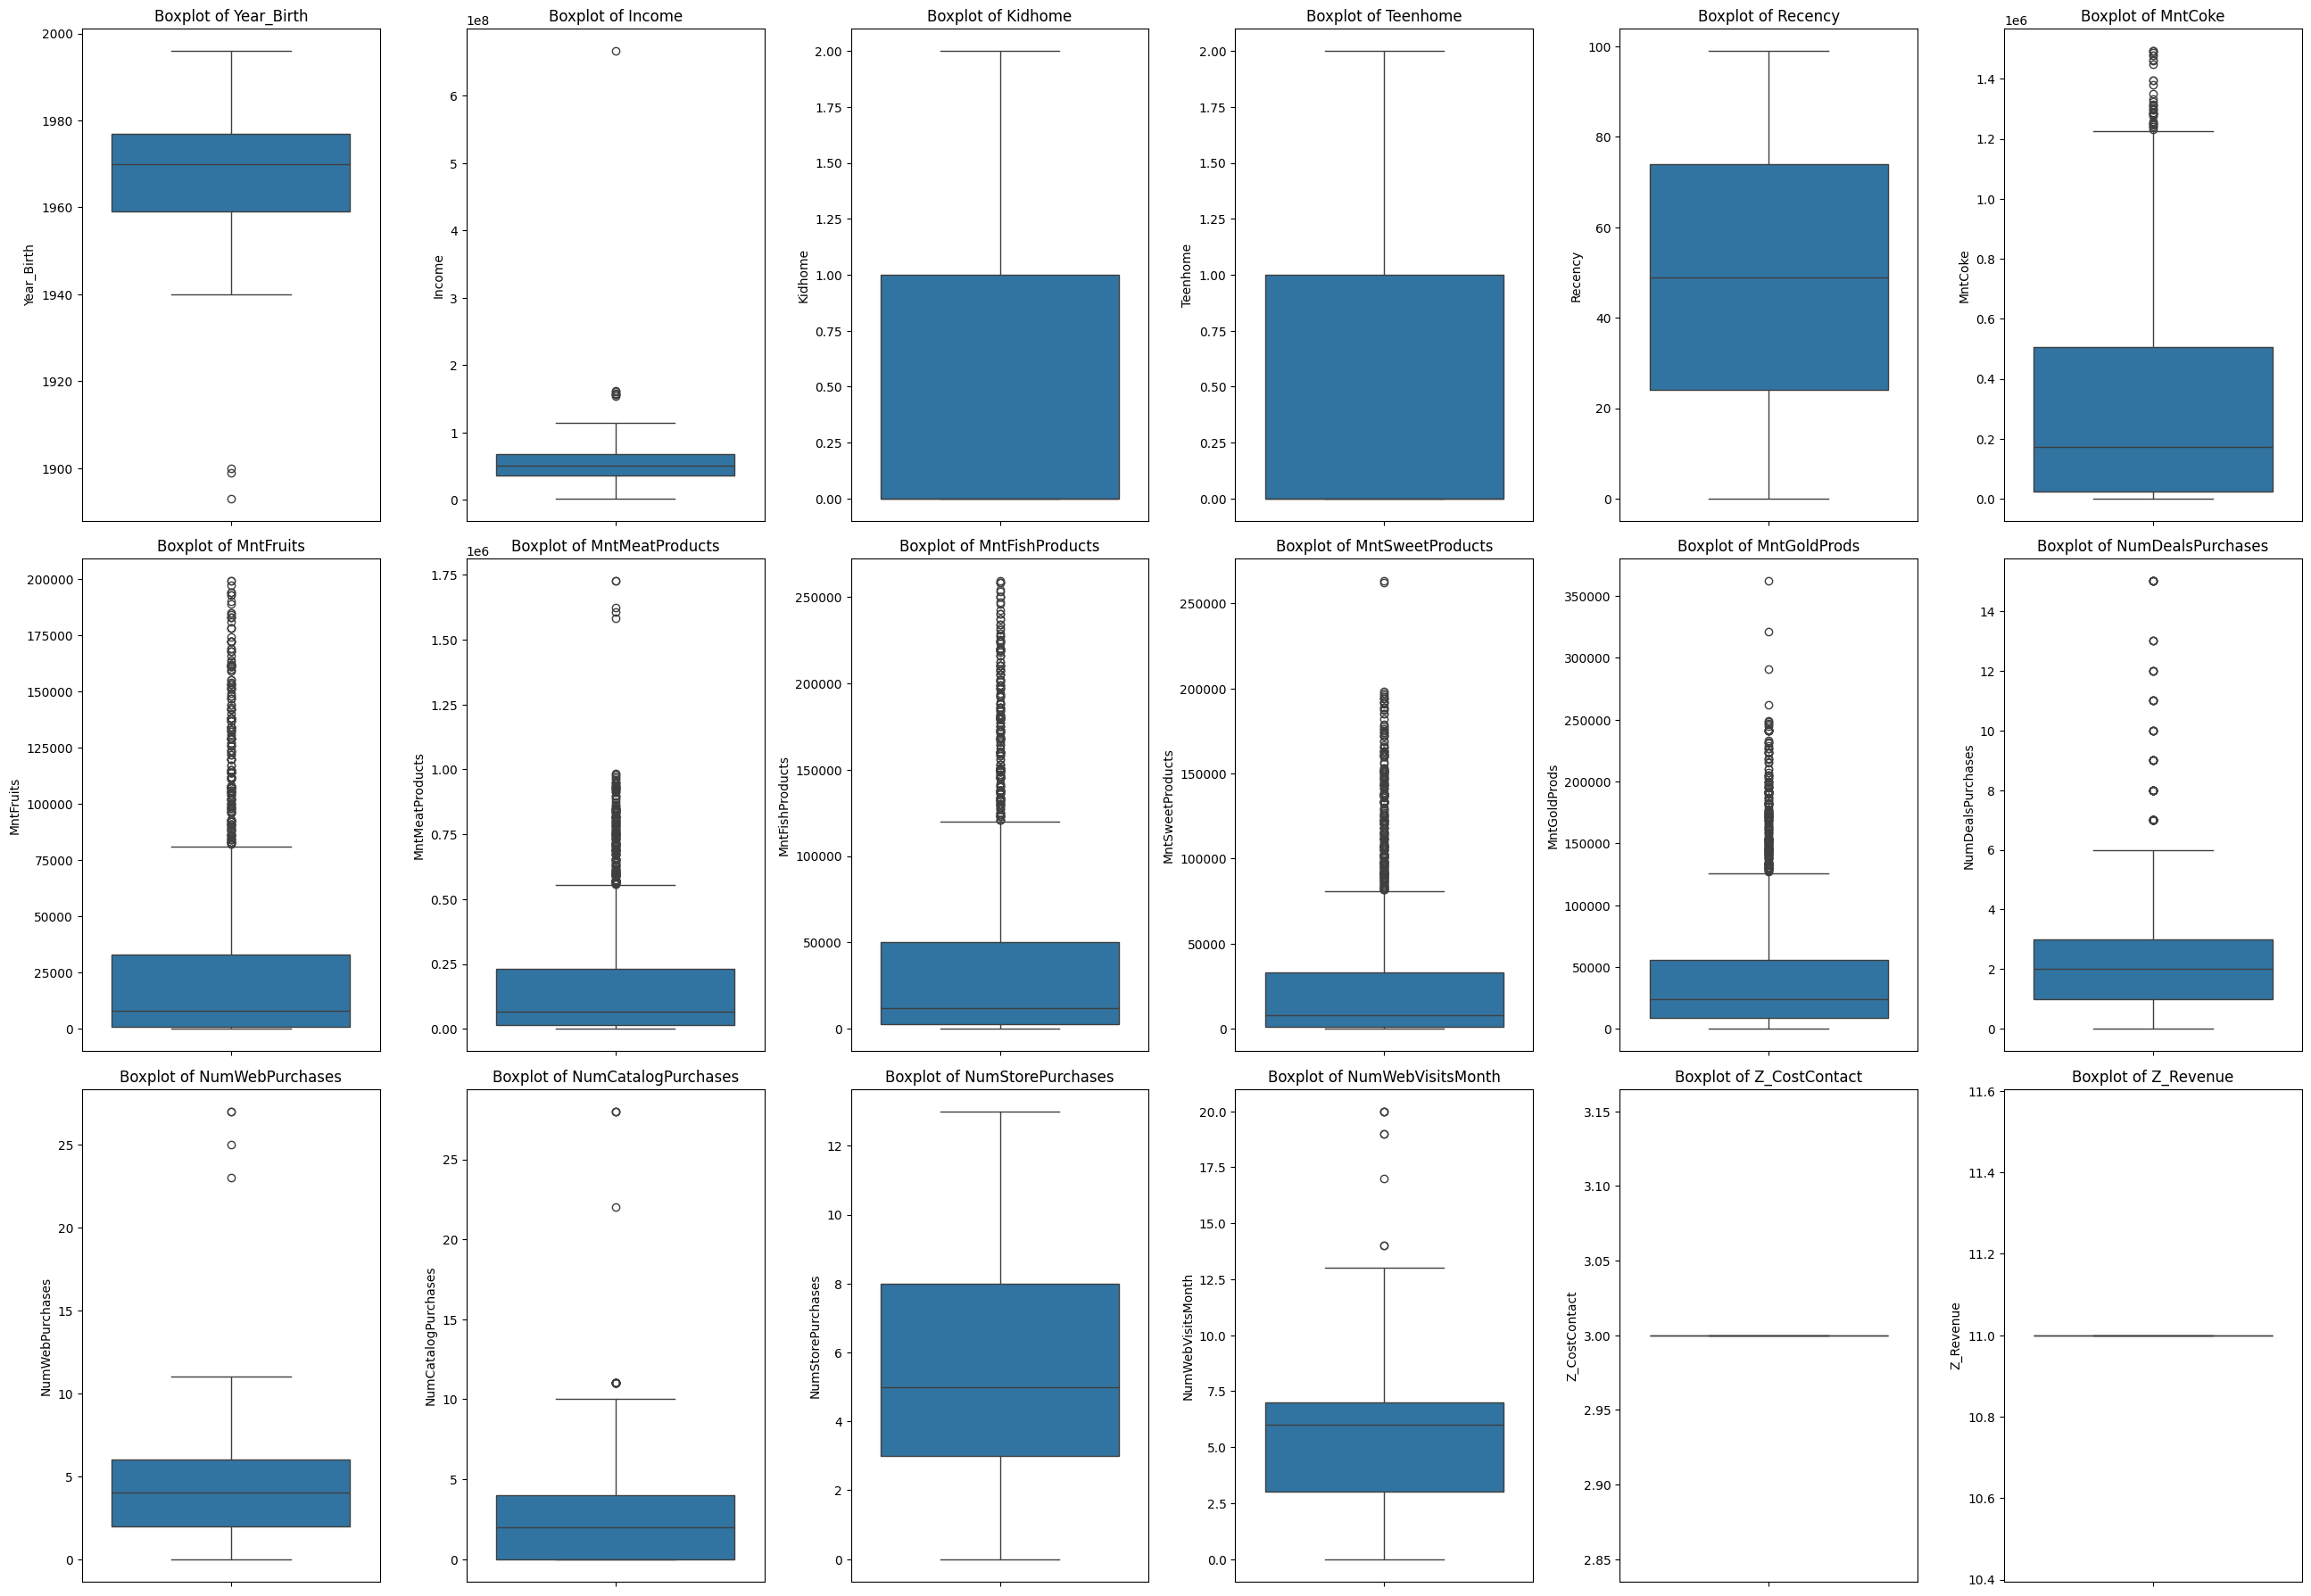

In [76]:
# Boxplot
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.boxplot(data=df, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Boxplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

There are columns with outlier values, we will check them further before handling them

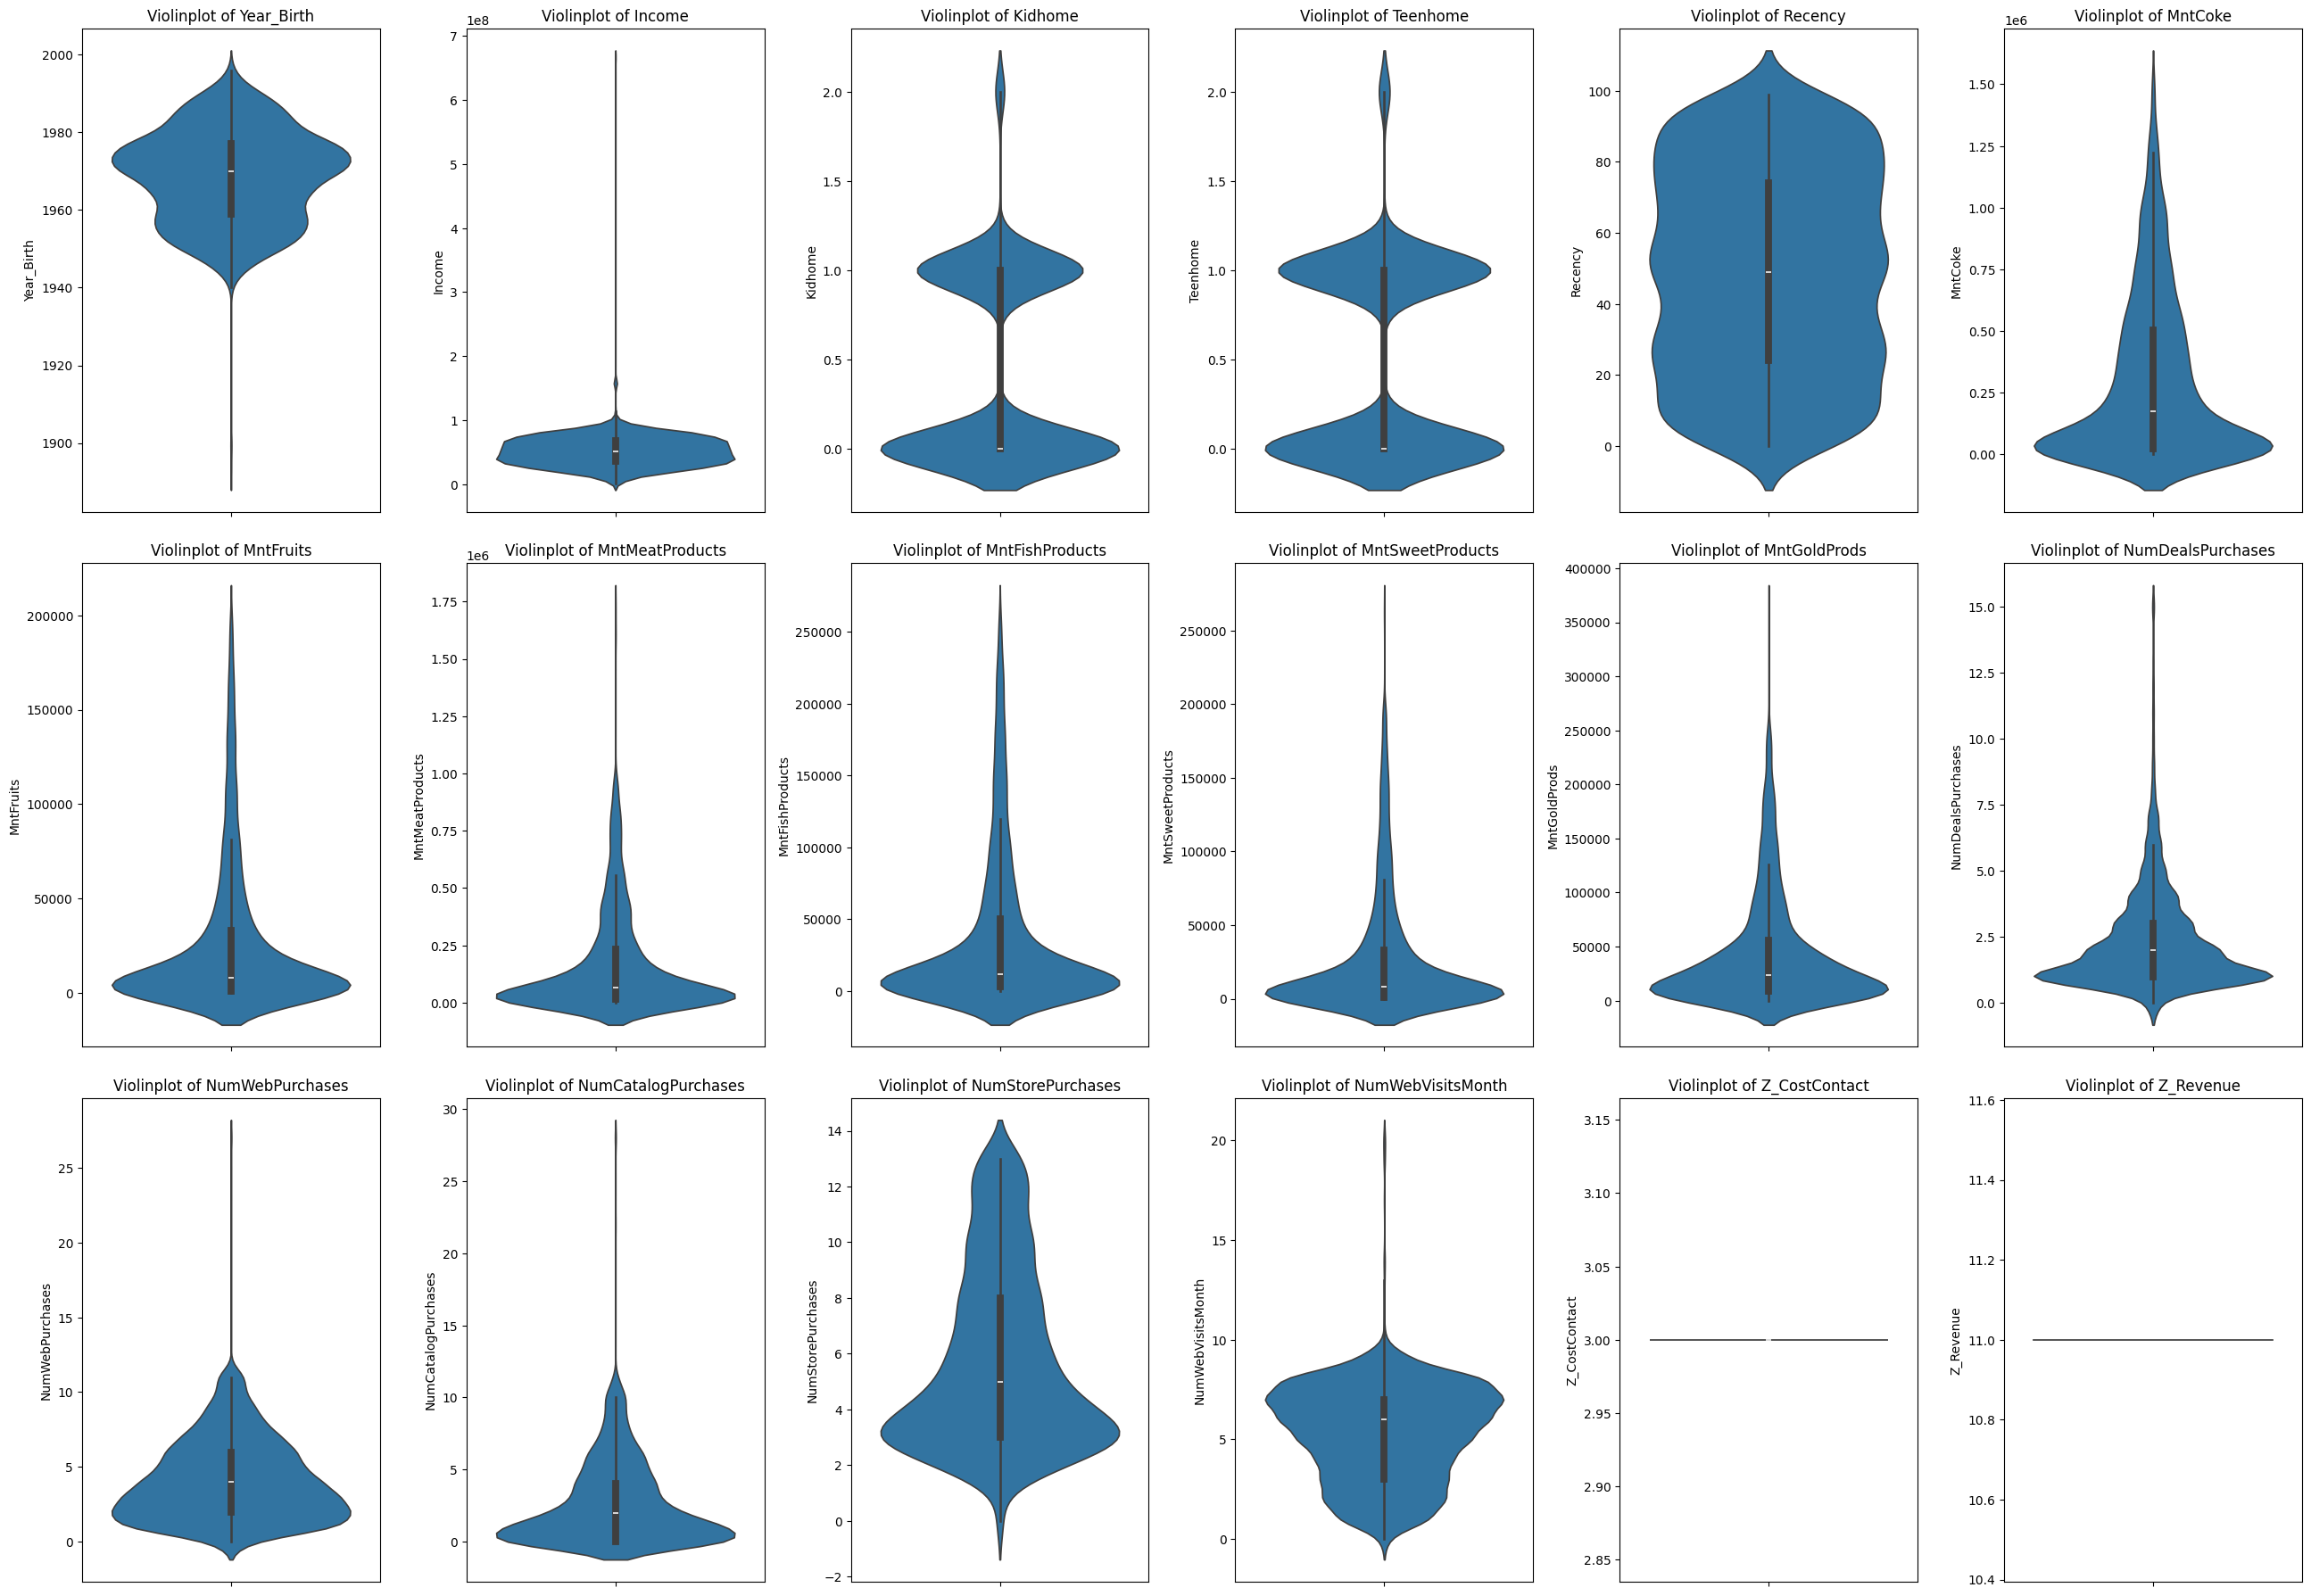

In [78]:
# Violinplot
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26,18))
ax = ax.flatten()

for i in range (len(nums_cols)) :
    sns.violinplot(data=df, ax=ax[i], y=nums_cols[i], orient='v')
    ax[i].set_title(f'Violinplot of {nums_cols[i]}')

plt.tight_layout()
plt.show()

In [87]:
# Outlier Detection

print(f'')
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print('Amount of Outlier Rows :', len(df[~filtered_entries]))
print('Amount of Non-Outlier Rows :', len(df[filtered_entries]))
print()

check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data':outlier,
    'Non-Outlier Data':no_outlier
})

check_outliers


Amount of Rows: 2240
Amount of Outlier Rows : 706
Amount of Non-Outlier Rows : 1534



Column Name  Outlier Exist  Lower Limit  Upper Limit  \
0            Year_Birth           True       1932.0       2004.0   
1                Income           True  -13587750.0  117416250.0   
2               Kidhome          False         -1.5          2.5   
3              Teenhome          False         -1.5          2.5   
4               Recency          False        -51.0        149.0   
5               MntCoke           True    -697000.0    1225000.0   
6             MntFruits           True     -47000.0      81000.0   
7       MntMeatProducts           True    -308000.0     556000.0   
8       MntFishProducts           True     -67500.0     120500.0   
9      MntSweetProducts           True     -47000.0      81000.0   
10         MntGoldProds           True     -61500.0     126500.0   
11    NumDealsPurchases           True         -2.0          6.0   
12      NumWebPurchases           True         -4.0         12.0   
13  NumCatalogPurchases           True         -6.0         10.0   
14    NumStorePurchases          False         -4.5         15.5   
15    NumWebVisitsMonth           True         -3.0         13.0   
16        Z_CostContact          False          3.0          3.0   
17            Z_Revenue          False         11.0         11.0   

    Outlier Data  Non-Outlier Data  
0              3              2237  
1              8              2232  
2              0              2240  
3              0              2240  
4              0              2240  
5             35              2205  
6            227              2013  
7            175              2065  
8            223              2017  
9            248              1992  
10           207              2033  
11            86              2154  
12             4              2236  
13            23              2217  
14             0              2240  
15             8              2232  
16             0              2240  
17             0              2240

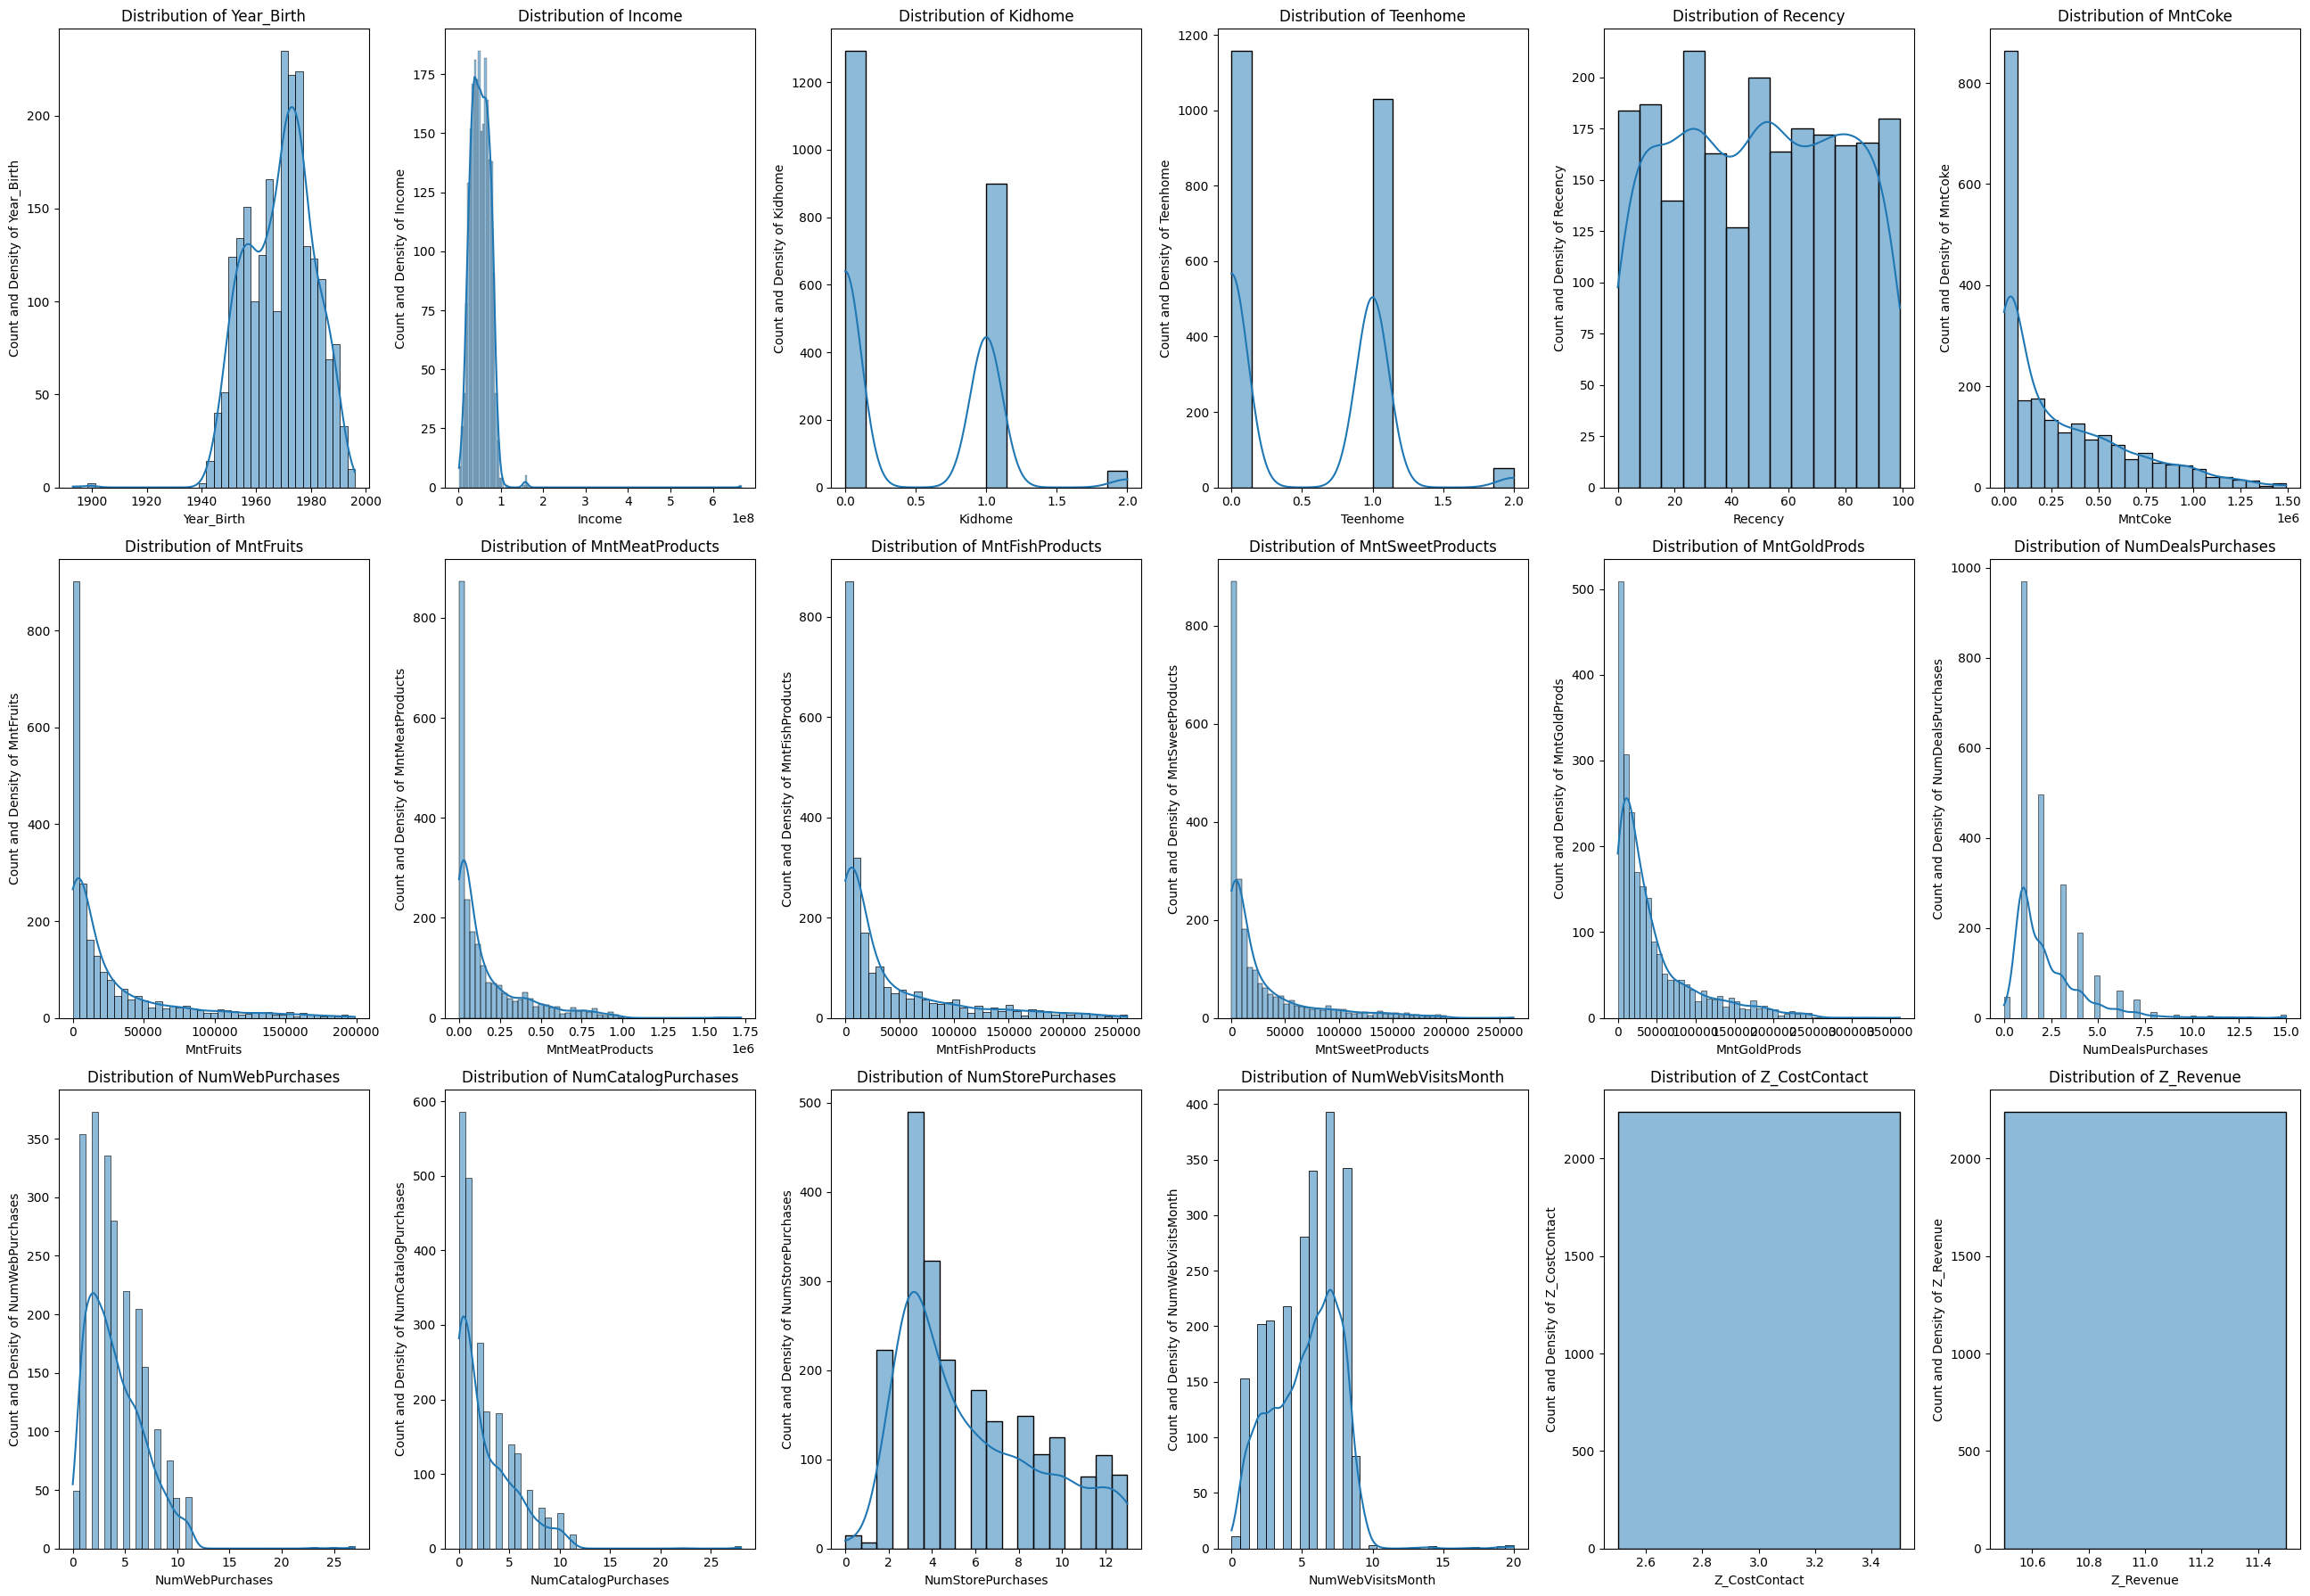

In [68]:
# Hisplot with kde
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(26, 18))
ax = ax.flatten()

for i in range(len(nums_cols)) :
  sns.histplot(data = df, ax=ax[i], x=nums_cols[i], kde=True)
  ax[i].set_title(f'Distribution of {nums_cols[i]}')
  ax[i].set_ylabel(f'Count and Density of {nums_cols[i]}')
  ax[i].set_xlabel(f'{nums_cols[i]}')

# Remove the last subplot if there are fewer features than subplots
if len(df.columns) < len(ax) :
    ax[len(df.columns)].remove()

plt.tight_layout()
plt.show()

In [98]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols:
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Z_CostContact', 'Z_Revenue']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Kidhome', 'Teenhome']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

Column Name  Skewness  Kurtosis  \
0            Year_Birth    -0.350     0.713   
1                Income     6.796   161.037   
2               Kidhome     0.635    -0.781   
3              Teenhome     0.407    -0.987   
4               Recency    -0.002    -1.202   
5               MntCoke     1.175     0.595   
6             MntFruits     2.101     4.039   
7       MntMeatProducts     2.082     5.502   
8       MntFishProducts     1.918     3.087   
9      MntSweetProducts     2.135     4.364   
10         MntGoldProds     1.885     3.541   
11    NumDealsPurchases     2.417     8.914   
12      NumWebPurchases     1.382     5.688   
13  NumCatalogPurchases     1.880     8.027   
14    NumStorePurchases     0.702    -0.623   
15    NumWebVisitsMonth     0.208     1.815   
16        Z_CostContact       NaN       NaN   
17            Z_Revenue       NaN       NaN   

                          Type of Distribution  
0   Moderately Normal Distribution (Symmetric)  
1                     Highly Positively Skewed  
2                         Bimodal Distribution  
3                         Bimodal Distribution  
4              Normal Distribution (Symmetric)  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                Moderately Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16                        Uniform Distribution  
17                        Uniform Distribution

## Categorical Columns

In [99]:
len(df[cats_cols].columns)

10

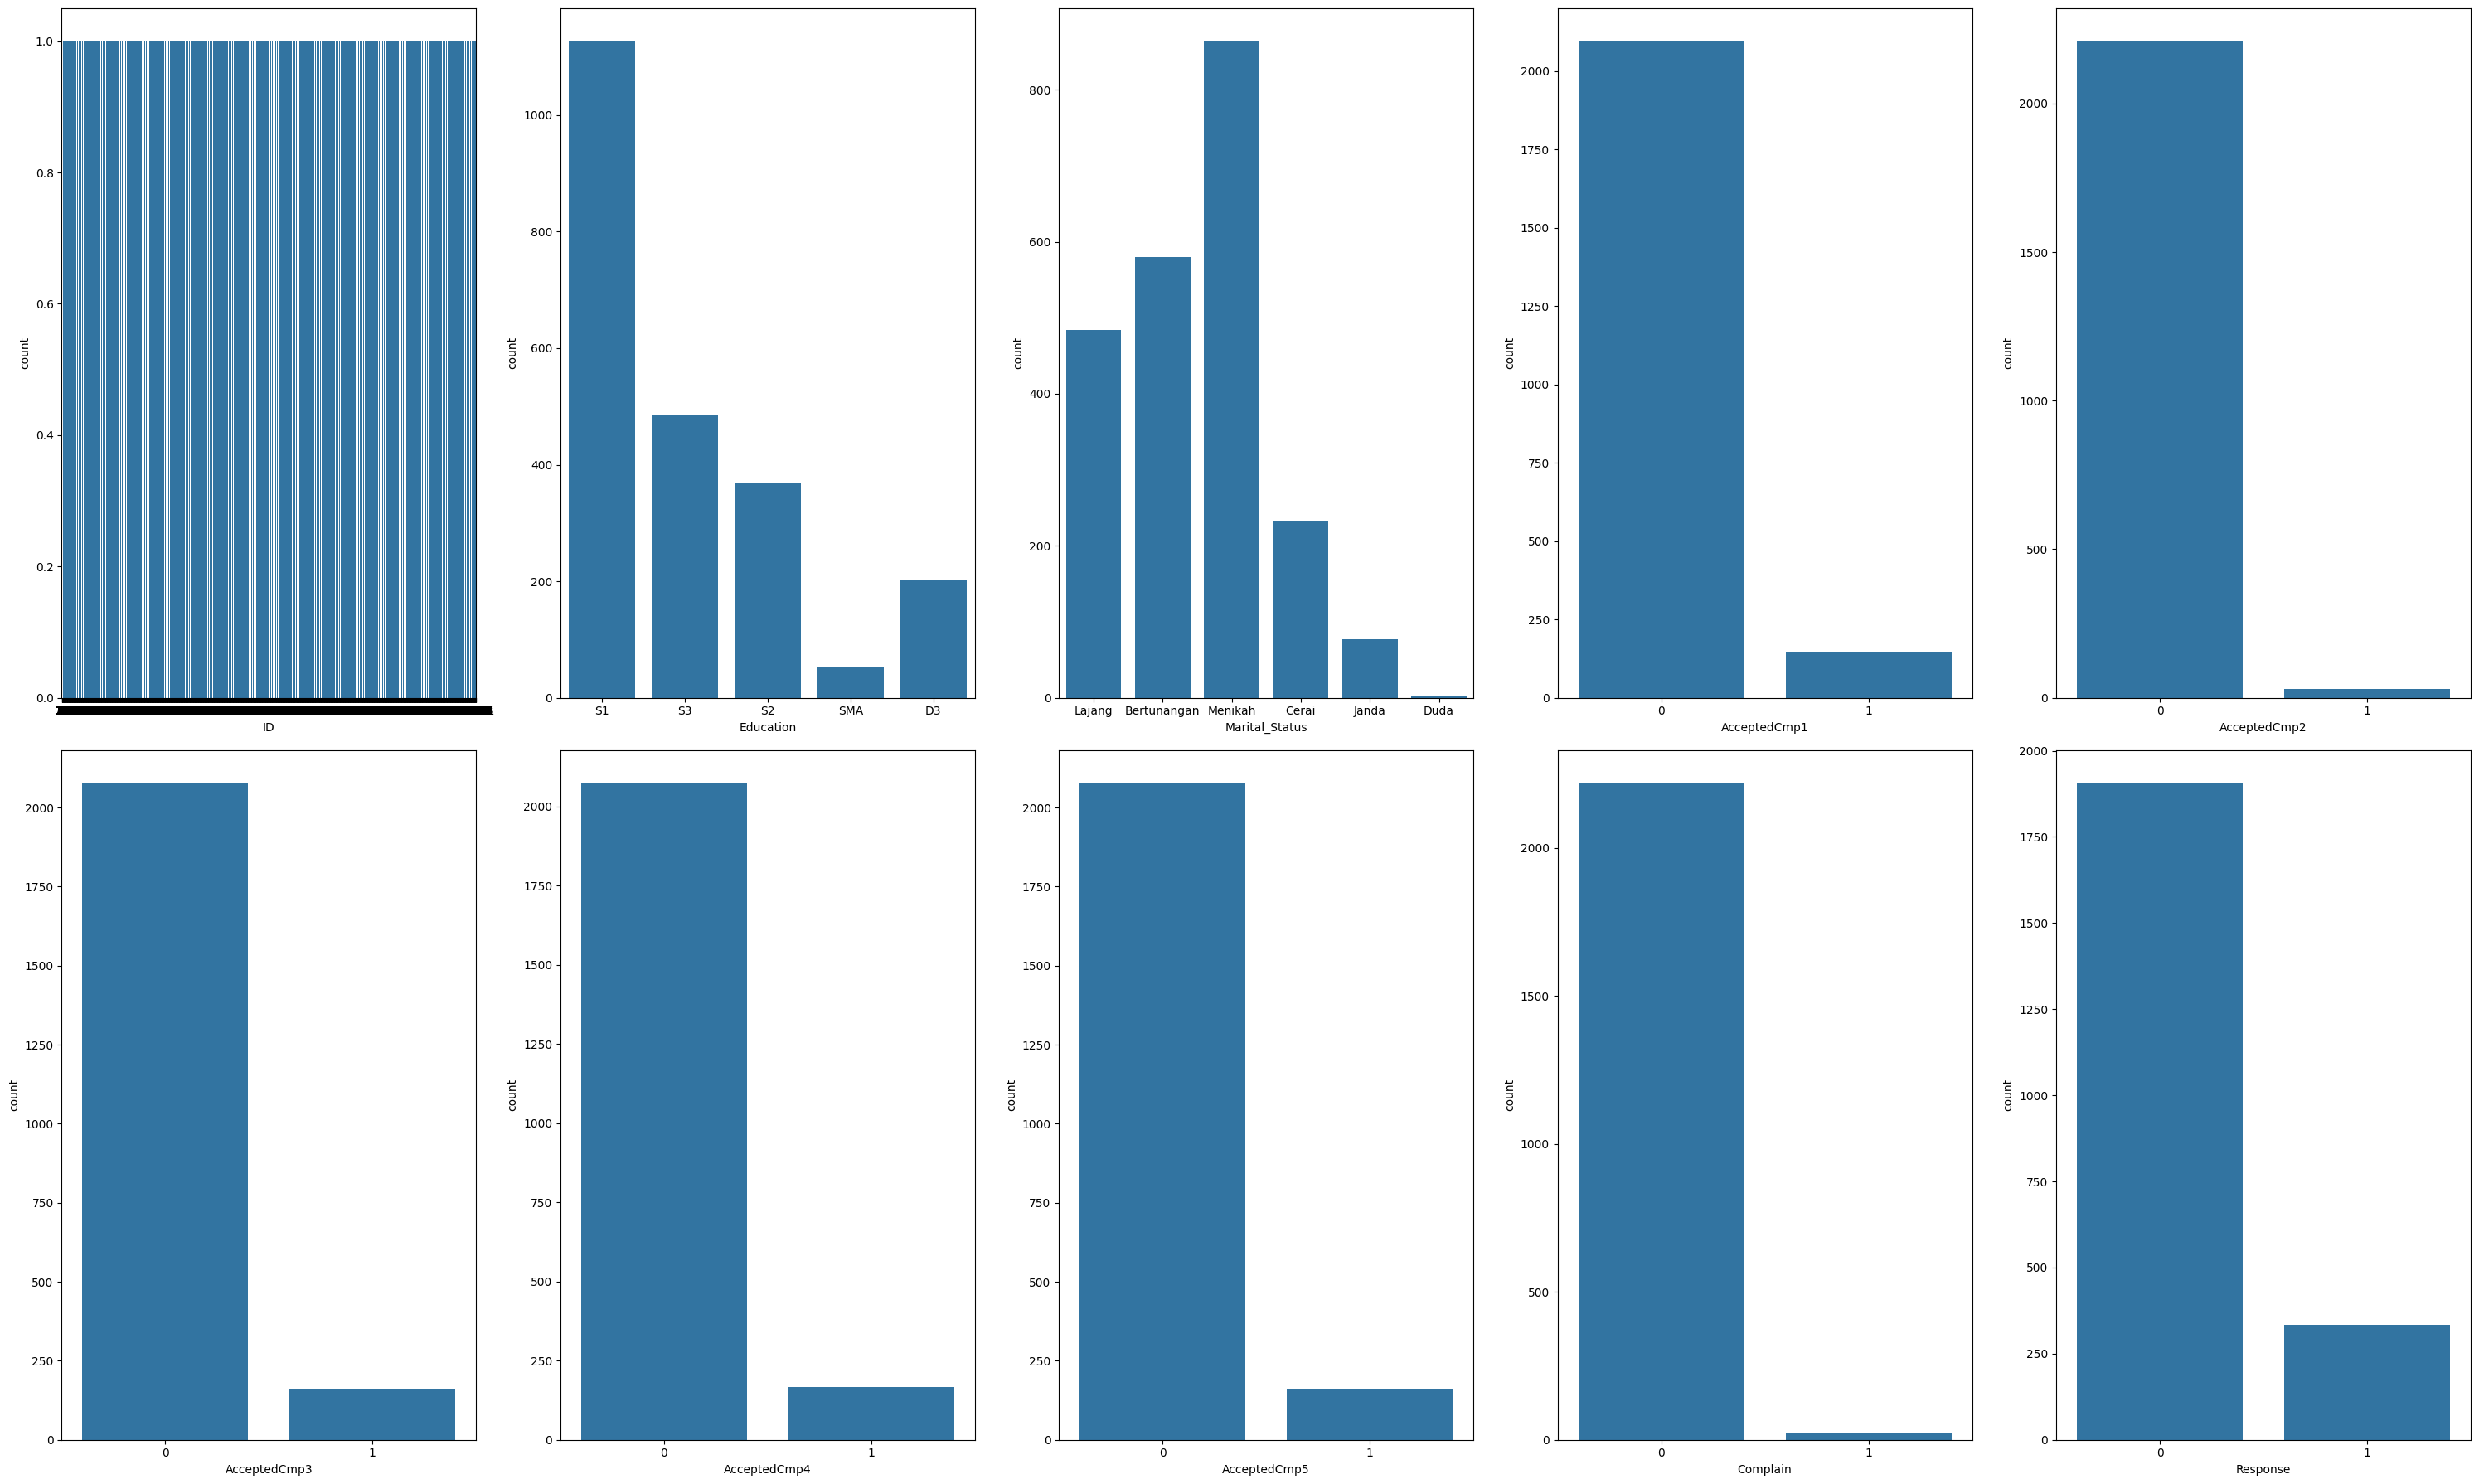

In [105]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,18))
ax = ax.flatten()

for i in range(len(cats_cols)) :
    sns.countplot(data=df, ax=ax[i], x=cats_cols[i])

plt.tight_layout()
plt.show()

In [ ]:
year = 
df['Age'] = df['Year_Birth'] - 

In [ ]:
sns.scatterplot(data=df, x='', y='')

In [ ]:
df['conversion_rate'] = 

In [9]:
?plt.bar_label

Signature:
plt.bar_label(
    container: 'BarContainer',
    labels: 'ArrayLike | None' = None,
    *,
    fmt: 'str | Callable[[float], str]' = '%g',
    label_type: "Literal['center', 'edge']" = 'edge',
    padding: 'float' = 0,
    **kwargs,
) -> 'list[Annotation]'
Docstring:
Label a bar plot.

Adds labels to bars in the given `.BarContainer`.
You may need to adjust the axis limits to fit the labels.

Parameters
----------
container : `.BarContainer`
    Container with all the bars and optionally errorbars, likely
    returned from `.bar` or `.barh`.

labels : array-like, optional
    A list of label texts, that should be displayed. If not given, the
    label texts will be the data values formatted with *fmt*.

fmt : str or callable, default: '%g'
    An unnamed %-style or {}-style format string for the label or a
    function to call with the value as the first argument.
    When *fmt* is a string and can be interpreted in both formats,
    %-style takes precedence over {}-style.


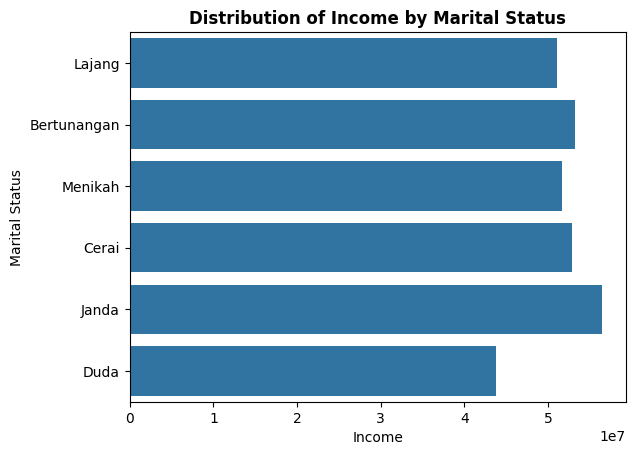

In [11]:
sns.barplot(data=df, x='Income', y='Marital_Status', ci=False)
plt.title('Distribution of Income by Marital Status', fontsize=12, weight='bold')
plt.ylabel('Marital Status')
# plt.bar_label(container=ax.containers[0])
plt.show()

<Figure size 3000x3000 with 0 Axes>

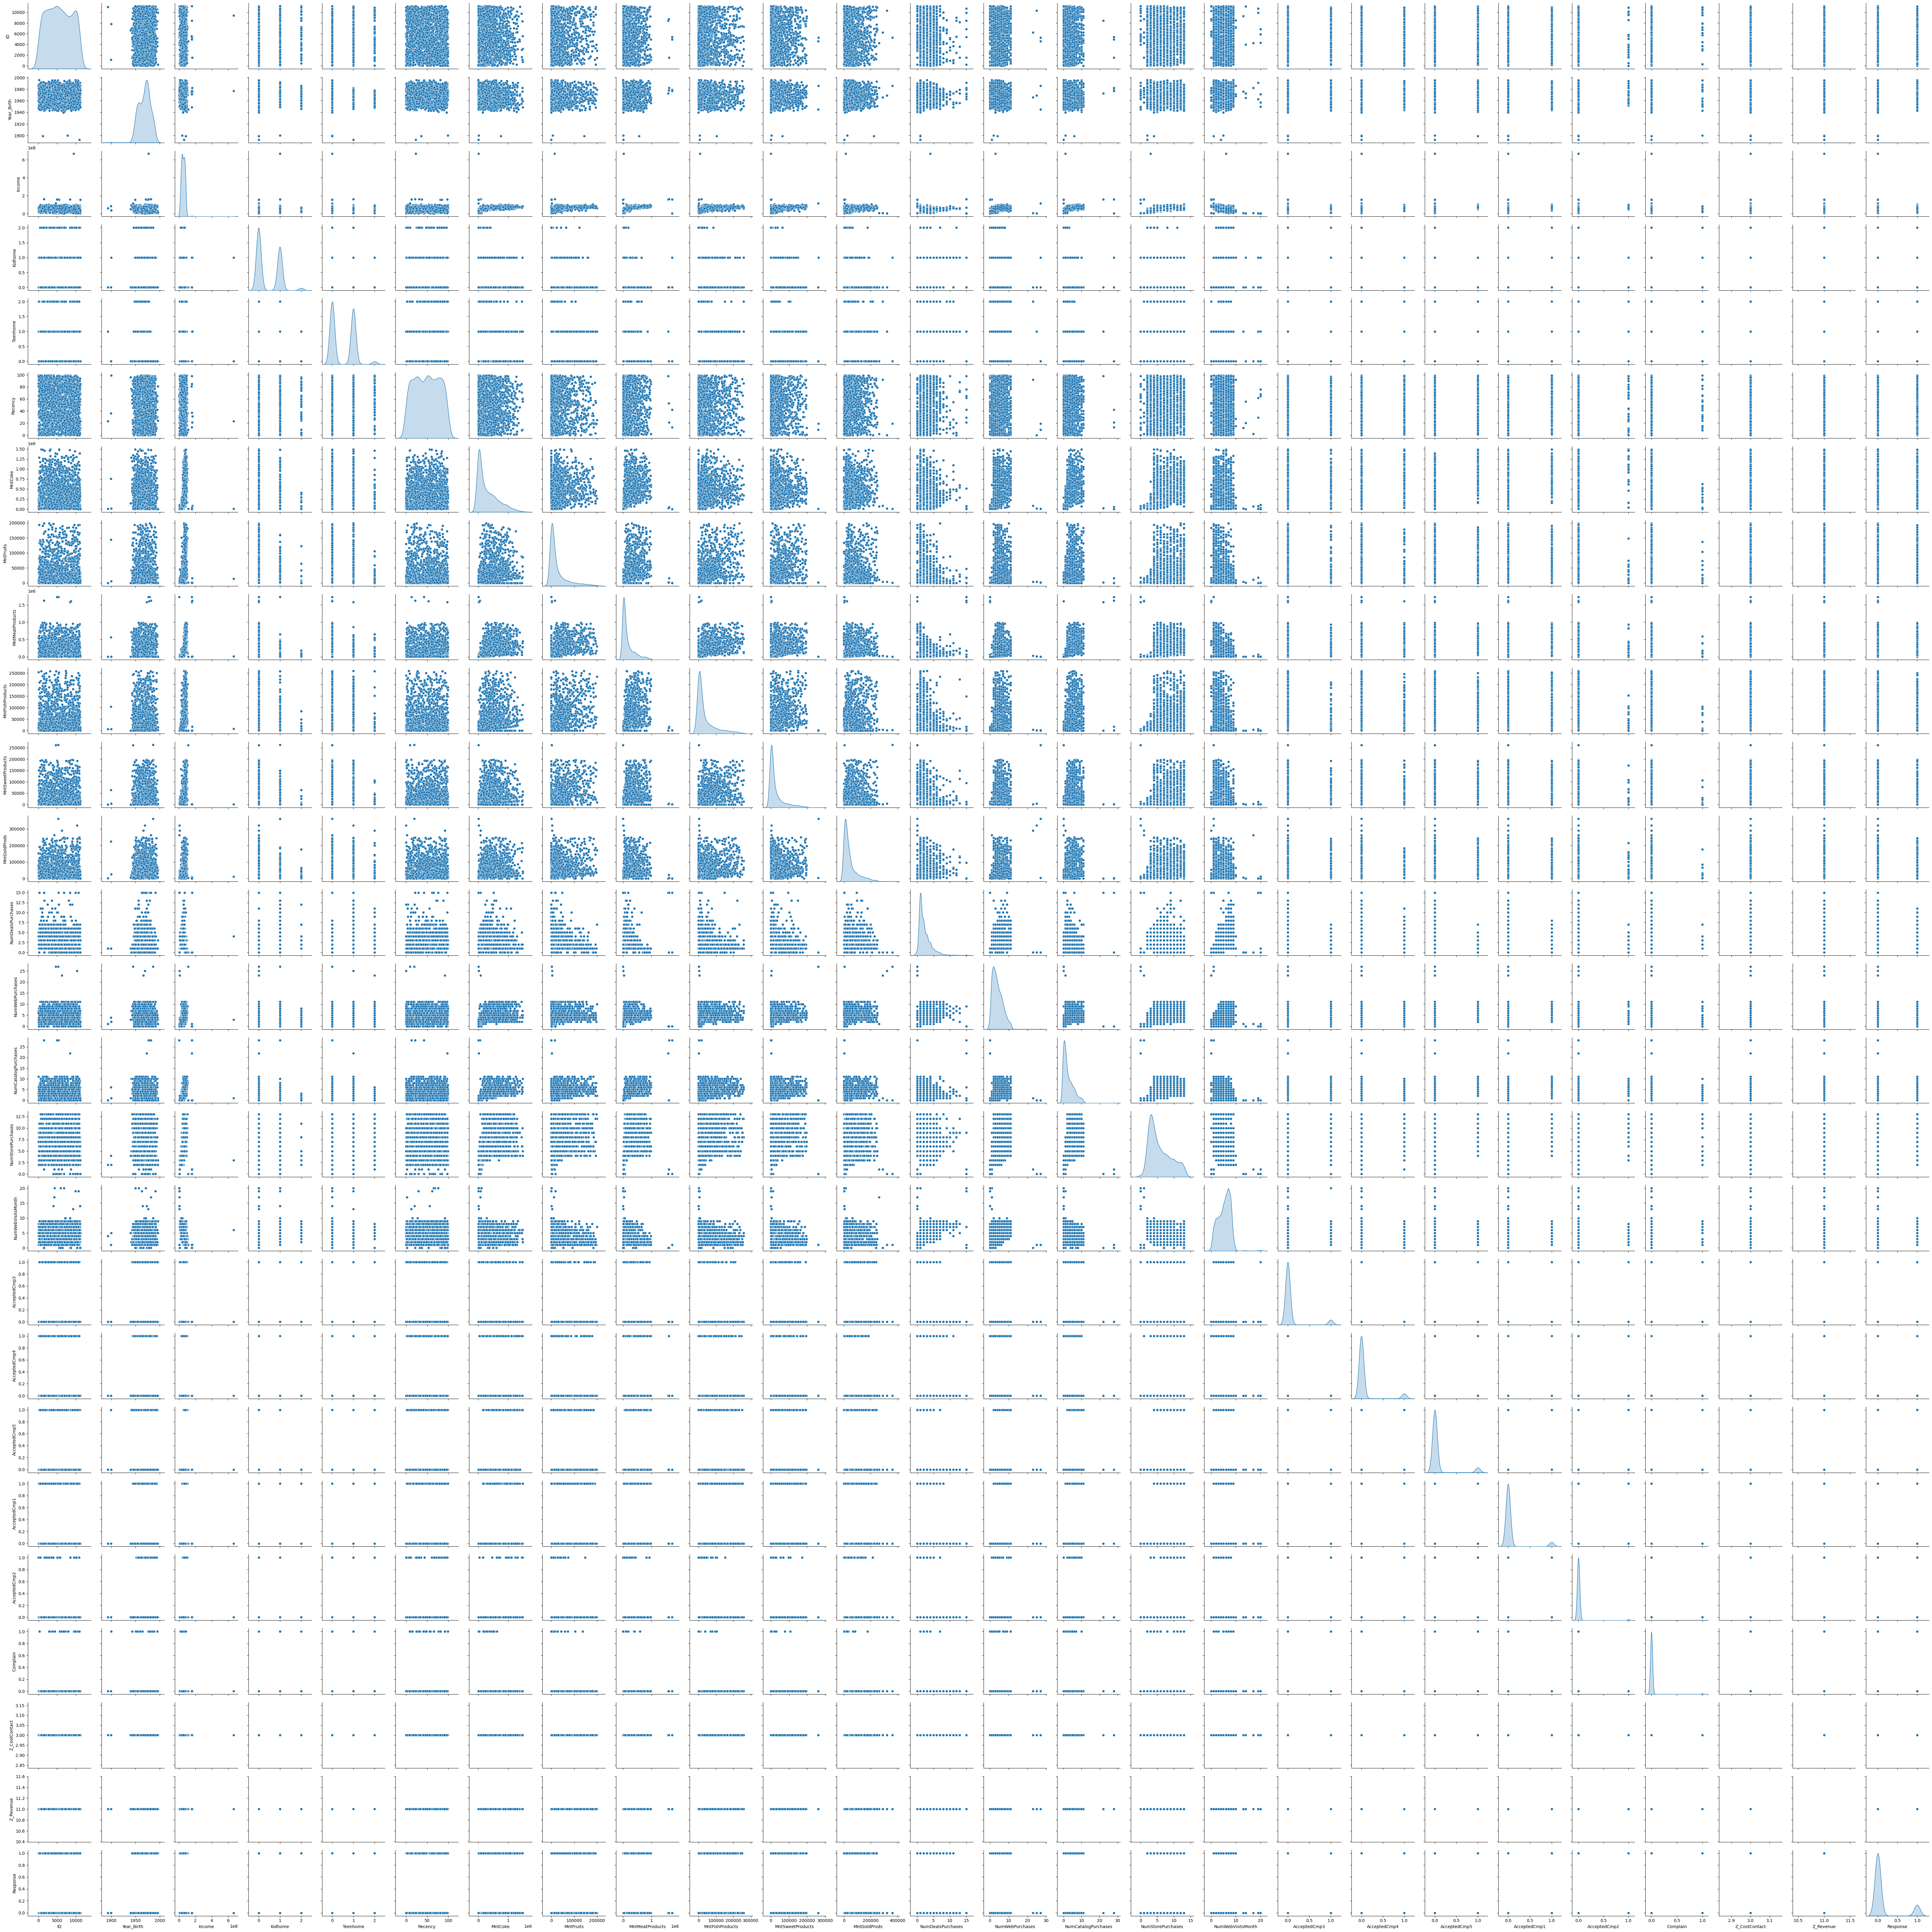

In [12]:
# plt.figure(figsize=(30,30))
# sns.pairplot(data=df, diag_kind='kde')
# plt.show()